In [ ]:
import pandas as pd

df1 = pd.read_csv("/content/HR_Dataset.csv")
df1

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [ ]:
df1['Departments ']= df1['Departments '].replace({'sales':'0', 'support':'1', 'management':'2', 'technical':'3', 'product_mng':'4',
       'RandD':'5', 'IT':'6', 'marketing':'7', 'hr':'8', 'accounting':'9'})
df1['Departments '] = df1['Departments '].astype('int')
df1['salary']= df1['salary'].replace({'low':'0', 'medium':'1', 'high':'2'})
df1['salary']= df1['salary'].astype('int')

In [ ]:
df1 = df1.drop_duplicates()
df1

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,0,0
1,0.80,0.86,5,262,6,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,2,2
11996,0.74,0.95,5,266,10,0,0,1,2,2
11997,0.85,0.54,3,185,10,0,0,1,2,2
11998,0.33,0.65,3,172,10,0,0,1,7,2


In [ ]:
# normal fitting

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score ,classification_report

x1 = df1.drop('left', axis=1)
y1 = df1['left']

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=42)

knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(x1_train, y1_train)
y1_pred = knn_classifier.predict(x1_test)

accuracy_1 = accuracy_score(y1_test, y1_pred)
print(f'Accuracy: {accuracy_1 * 100:.2f}%')
classification_rep = classification_report(y1_test, y1_pred)
print(f'Classification Report:\n{classification_rep}')

Accuracy: 93.75%
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1998
           1       0.78      0.86      0.82       401

    accuracy                           0.94      2399
   macro avg       0.88      0.91      0.89      2399
weighted avg       0.94      0.94      0.94      2399



In [ ]:
from scipy import stats

z_scores = stats.zscore(df1)
threshold = 3
outliers = (z_scores > threshold).all(axis=1)
df10 = df1[~outliers]

x10 = df10.drop('left', axis=1)
y10 = df10['left']

x10_train, x10_test, y10_train, y10_test = train_test_split(x10, y10, test_size=0.2)

knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(x10_train, y10_train)
y10_pred = knn_classifier.predict(x10_test)

accuracy = accuracy_score(y10_test, y10_pred)
print(f"Accuracy: {accuracy}")
classification_rep = classification_report(y10_test, y10_pred)
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9420591913297207
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      2000
           1       0.80      0.87      0.83       399

    accuracy                           0.94      2399
   macro avg       0.89      0.91      0.90      2399
weighted avg       0.94      0.94      0.94      2399



In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_standard = StandardScaler()
x1_train_standardized = scaler_standard.fit_transform(x1_train)
x1_test_standardized = scaler_standard.transform(x1_test)

scaler_minmax = MinMaxScaler()
x1_train_normalized = scaler_minmax.fit_transform(x1_train)
x1_test_normalized = scaler_minmax.transform(x1_test)

knn_classifier.fit(x1_train_standardized, y1_train)
y1_pred_stand = knn_classifier.predict(x1_test_standardized)
accuracy_stand = accuracy_score(y1_test, y1_pred_stand)
print(f'Accuracy after standarization: {accuracy_stand * 100:.2f}%')
classification_rep = classification_report(y1_test, y1_pred_stand)
print(f'Classification Report:\n{classification_rep}')

knn_classifier.fit(x1_train_normalized, y1_train)
y1_pred_nor = knn_classifier.predict(x1_test_normalized)
accuracy_nor = accuracy_score(y1_test, y1_pred_nor)
print(f'Accuracy after normalization: {accuracy_stand * 100:.2f}%')
classification_rep = classification_report(y1_test, y1_pred_nor)
print(f'Classification Report:\n{classification_rep}')

Accuracy after standarization: 95.91%
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1998
           1       0.87      0.89      0.88       401

    accuracy                           0.96      2399
   macro avg       0.92      0.93      0.93      2399
weighted avg       0.96      0.96      0.96      2399

Accuracy after normalization: 95.91%
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1998
           1       0.87      0.89      0.88       401

    accuracy                           0.96      2399
   macro avg       0.92      0.93      0.93      2399
weighted avg       0.96      0.96      0.96      2399



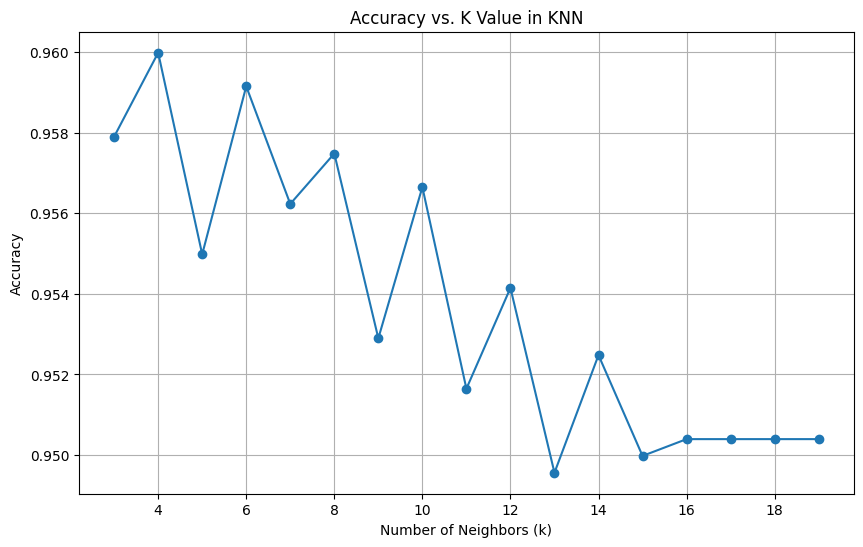

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

k_values = np.arange(3,20)
accuracy_values = []
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(x1_train_normalized, y1_train)
    y1_pred = knn_classifier.predict(x1_test_normalized)
    accuracy = accuracy_score(y1_test, y1_pred)
    accuracy_values.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_values, marker='o', linestyle='-')
plt.title('Accuracy vs. K Value in KNN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

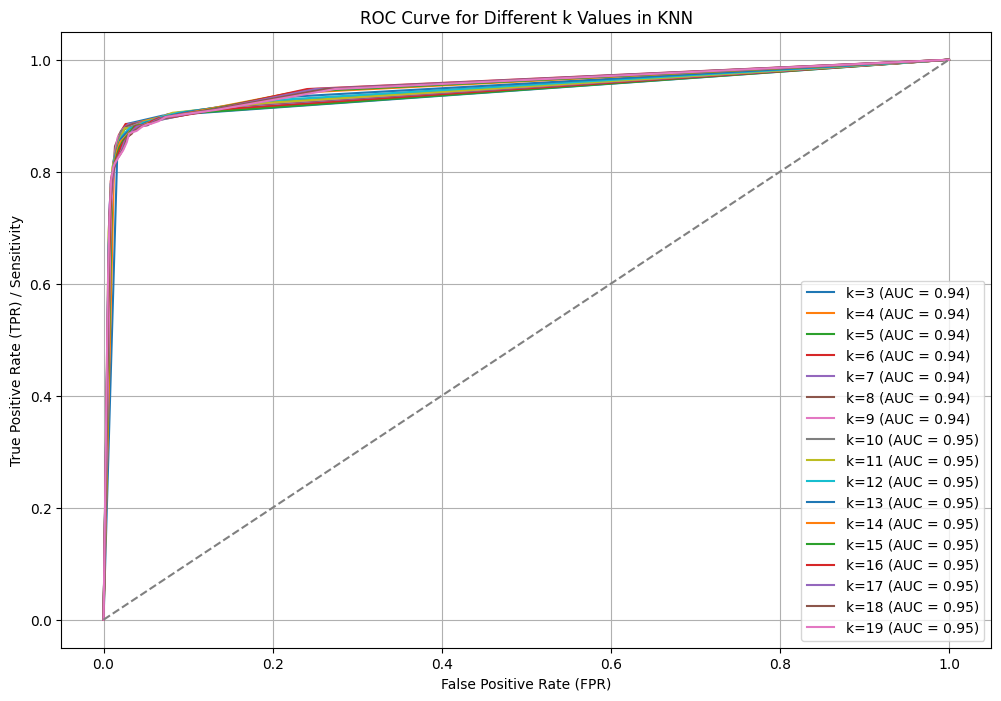

In [ ]:
from sklearn.metrics import roc_curve, auc
k_values = np.arange(3,20)
accuracy_values = []
plt.figure(figsize=(12, 8))

for k in k_values:

    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(x1_train_normalized, y1_train)
    y1_pred = knn_classifier.predict(x1_test_normalized)
    accuracy = accuracy_score(y1_test, y1_pred)
    accuracy_values.append(accuracy)
    y_prob = knn_classifier.predict_proba(x1_test_normalized)[:, 1]

    fpr, tpr, _ = roc_curve(y1_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'k={k} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve for Different k Values in KNN')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) / Sensitivity')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, LeaveOneOut, ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

k_values = np.arange(3,20)
accuracy_stratified = []
accuracy_kfold = []
accuracy_shuffled = []
accuracy_leave_one_out = []

scaler_minmax = MinMaxScaler()
x1_normalized = scaler_minmax.fit_transform(x1)

for k in k_values:

    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    stratified_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    scores = cross_val_score(knn_classifier,x1_normalized, y1, cv=stratified_cv, scoring='accuracy')
    accuracy_stratified.append(np.mean(scores))

    kfold_cv = KFold(n_splits=10, shuffle=True, random_state=42)
    scores = cross_val_score(knn_classifier,x1_normalized, y1, cv=kfold_cv, scoring='accuracy')
    accuracy_kfold.append(np.mean(scores))

    shuffled_cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
    scores = cross_val_score(knn_classifier,x1_normalized, y1, cv=shuffled_cv, scoring='accuracy')
    accuracy_shuffled.append(np.mean(scores))

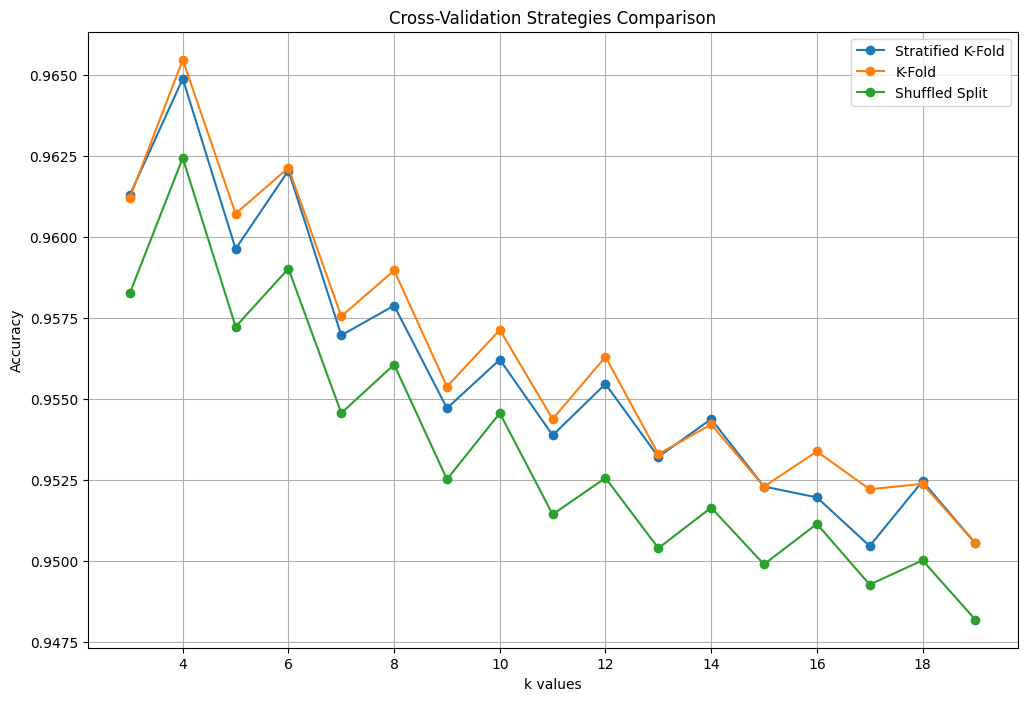

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(k_values, accuracy_stratified, label='Stratified K-Fold', marker='o')
plt.plot(k_values, accuracy_kfold, label='K-Fold', marker='o')
plt.plot(k_values, accuracy_shuffled, label='Shuffled Split', marker='o')

plt.title('Cross-Validation Strategies Comparison')
plt.xlabel('k values')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.ensemble import BaggingClassifier

bagging_model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=4),
                                  n_estimators=10, random_state=42)
bagging_model.fit(x1_train_normalized, y1_train)
y_pred_bagging = bagging_model.predict(x1_test_normalized)
accuracy_bagging = accuracy_score(y1_test, y_pred_bagging)
print(f"Accuracy with Bagging: {accuracy_bagging:.2f}")
classification_rep = classification_report(y1_test, y_pred_bagging)
print(f'Classification Report:\n{classification_rep}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy with Bagging: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1998
           1       0.87      0.89      0.88       401

    accuracy                           0.96      2399
   macro avg       0.92      0.93      0.93      2399
weighted avg       0.96      0.96      0.96      2399



In [ ]:
# we cant apply boosting because knn cant take weights

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=42)

undersampler = RandomUnderSampler(random_state=42)
x1_resampled, y1_resampled = undersampler.fit_resample(x1_train_normalized, y1_train)

knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model.fit(x1_resampled, y1_resampled)
y1_pred = knn_model.predict(x1_test_normalized)

accuracy = accuracy_score(y1_test, y1_pred)
print(f"Accuracy after Undersampling: {accuracy:.2f}")
classification_rep = classification_report(y1_test, y1_pred)
print(f'Classification Report:\n{classification_rep}')

Accuracy after Undersampling: 0.93
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1998
           1       0.74      0.90      0.81       401

    accuracy                           0.93      2399
   macro avg       0.86      0.92      0.89      2399
weighted avg       0.94      0.93      0.93      2399



In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=42)

oversampler = RandomOverSampler(random_state=42)
x1_resampled, y1_resampled = oversampler.fit_resample(x1_train_normalized, y1_train)

knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model.fit(x1_resampled, y1_resampled)
y1_pred = knn_model.predict(x1_test_normalized)

accuracy = accuracy_score(y1_test, y1_pred)
print(f"Accuracy after Oversampling: {accuracy:.2f}")
classification_rep = classification_report(y1_test, y1_pred)
print(f'Classification Report:\n{classification_rep}')

Accuracy after Oversampling: 0.94
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1998
           1       0.78      0.90      0.83       401

    accuracy                           0.94      2399
   macro avg       0.88      0.92      0.90      2399
weighted avg       0.95      0.94      0.94      2399



In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

smote = SMOTE(random_state=42)
x1_resampled, y1_resampled = smote.fit_resample(x1_train_normalized, y1_train)
knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model.fit(x1_resampled, y1_resampled)

y1_pred = knn_model.predict(x1_test_normalized)

accuracy = accuracy_score(y1_test, y1_pred)
print(f"Accuracy after SMOTE: {accuracy:.2f}")
classification_rep = classification_report(y1_test, y1_pred)
print(f'Classification Report:\n{classification_rep}')

Accuracy after SMOTE: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1998
           1       0.80      0.90      0.85       401

    accuracy                           0.95      2399
   macro avg       0.89      0.93      0.91      2399
weighted avg       0.95      0.95      0.95      2399



In [ ]:
from imblearn.over_sampling import ADASYN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

adasyn = ADASYN(sampling_strategy='auto', random_state=42)
x1_resampled, y1_resampled = adasyn.fit_resample(x1_train_normalized, y1_train)

knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model.fit(x1_resampled, y1_resampled)
y1_pred = knn_model.predict(x1_test_normalized)

accuracy = accuracy_score(y1_test, y1_pred)
print(f"Accuracy with ADASYN: {accuracy:.2f}")
classification_rep = classification_report(y1_test, y1_pred)
print(f'Classification Report:\n{classification_rep}')

Accuracy with ADASYN: 0.91
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1998
           1       0.68      0.90      0.78       401

    accuracy                           0.91      2399
   macro avg       0.83      0.91      0.86      2399
weighted avg       0.93      0.91      0.92      2399



In [ ]:
import pandas as pd

df2 = pd.read_csv("/content/dataset4.csv")
df2

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,...,3,80,1,17,3,3,5,2,0,3
1466,1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,...,1,80,1,9,5,3,7,7,1,7
1467,1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,...,2,80,1,6,0,3,6,2,0,3
1468,1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
df2 = df2.drop_duplicates()
df2 = df2.iloc[:,1:]

In [ ]:
df2['Over18']= df2['Over18'].replace({'Y':'0'})
df2['OverTime'] = df2['OverTime'].replace({'Yes':'1','No':'0'})
df2['JobRole'] = df2['JobRole'].replace({'Sales Executive':'0','Research Scientist':'1','Laboratory Technician':'2',
 'Manufacturing Director':'3','Healthcare Representative':'4','Manager':'5',
 'Sales Representative':'6','Research Director':'7', 'Human Resources':'8'})
df2['MaritalStatus'] = df2['MaritalStatus'].replace({'Single':'0','Married':'1','Divorced':'2'})
df2['Attrition'] = df2['Attrition'].replace({'Yes':'1','No':'0'})
df2['BusinessTravel'] = df2['BusinessTravel'].replace({'Travel_Rarely':'0','Travel_Frequently':'1','Non-Travel':'2'})
df2['Department'] = df2['Department'].replace({'Sales':'0','Research & Development':'1','Human Resources':'2'})
df2['EducationField'] = df2['EducationField'].replace({'Life Sciences':'0','Medical':'1','Marketing':'2','Technical Degree':'3','Human Resources':'4','Other':'5'})
df2['Gender'] = df2['Gender'].replace({'Female':'0','Male':'1'})

df2['Over18']= df2['Over18'].astype('int')
df2['OverTime']=df2['OverTime'].astype('int')
df2['JobRole']= df2['JobRole'].astype('int')
df2['MaritalStatus']= df2['MaritalStatus'].astype('int')
df2['Attrition'] = df2['Attrition'].astype('int')
df2['BusinessTravel'] = df2['BusinessTravel'].astype('int')
df2['Department'] = df2['Department'].astype('int')
df2['EducationField'] = df2['EducationField'].astype('int')
df2['Gender'] = df2['Gender'].astype('int')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score ,classification_report

x2 = df2.drop('Attrition', axis=1)
y2 = df2['Attrition']

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=42)

knn_classifier = KNeighborsClassifier(n_neighbors=4)
knn_classifier.fit(x2_train, y2_train)
y2_pred = knn_classifier.predict(x2_test)

accuracy_1 = accuracy_score(y2_test, y2_pred)
print(f'Accuracy: {accuracy_1 * 100:.2f}%')
classification_rep = classification_report(y2_test, y2_pred)
print(f'Classification Report:\n{classification_rep}')

Accuracy: 85.37%
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       255
           1       0.17      0.03      0.04        39

    accuracy                           0.85       294
   macro avg       0.52      0.50      0.48       294
weighted avg       0.78      0.85      0.80       294



In [ ]:
from scipy import stats

z_scores = stats.zscore(df2)
threshold = 3
outliers = (z_scores > threshold).all(axis=1)
df10 = df2[~outliers]

x10 = df10.drop('Attrition', axis=1)
y10 = df10['Attrition']

x10_train, x10_test, y10_train, y10_test = train_test_split(x10, y10, test_size=0.2)

knn_classifier = KNeighborsClassifier(n_neighbors=4)
knn_classifier.fit(x10_train, y10_train)
y10_pred = knn_classifier.predict(x10_test)

accuracy = accuracy_score(y10_test, y10_pred)
print(f"Accuracy: {accuracy}")
classification_rep = classification_report(y10_test, y10_pred)
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.8571428571428571
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       253
           1       0.43      0.07      0.12        41

    accuracy                           0.86       294
   macro avg       0.65      0.53      0.52       294
weighted avg       0.81      0.86      0.81       294



In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_standard = StandardScaler()
x2_train_standardized = scaler_standard.fit_transform(x2_train)
x2_test_standardized = scaler_standard.transform(x2_test)

scaler_minmax = MinMaxScaler()
x2_train_normalized = scaler_minmax.fit_transform(x2_train)
x2_test_normalized = scaler_minmax.transform(x2_test)

knn_classifier.fit(x2_train_standardized, y2_train)
y2_pred_stand = knn_classifier.predict(x2_test_standardized)
accuracy_stand = accuracy_score(y2_test, y2_pred_stand)
print(f'Accuracy after standarization: {accuracy_stand * 100:.2f}%')
classification_rep = classification_report(y2_test, y2_pred_stand)
print(f'Classification Report:\n{classification_rep}')

knn_classifier.fit(x2_train_normalized, y2_train)
y2_pred_nor = knn_classifier.predict(x2_test_normalized)
accuracy_nor = accuracy_score(y2_test, y2_pred_nor)
print(f'Accuracy after normalization: {accuracy_stand * 100:.2f}%')
classification_rep = classification_report(y2_test, y2_pred_nor)
print(f'Classification Report:\n{classification_rep}')

Accuracy after standarization: 86.39%
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       255
           1       0.40      0.05      0.09        39

    accuracy                           0.86       294
   macro avg       0.64      0.52      0.51       294
weighted avg       0.81      0.86      0.82       294

Accuracy after normalization: 86.39%
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.50      0.08      0.13        39

    accuracy                           0.87       294
   macro avg       0.69      0.53      0.53       294
weighted avg       0.83      0.87      0.82       294



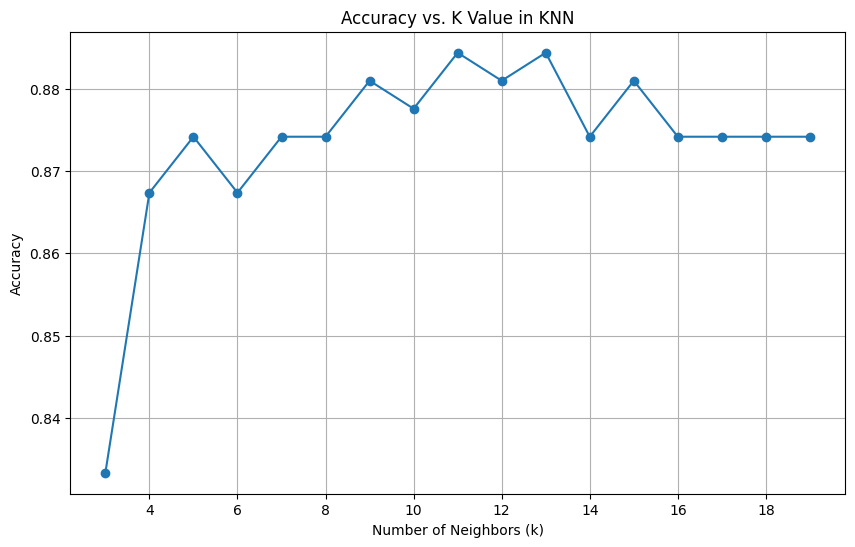

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

k_values = np.arange(3,20)
accuracy_values = []
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(x2_train_normalized, y2_train)
    y2_pred = knn_classifier.predict(x2_test_normalized)
    accuracy = accuracy_score(y2_test, y2_pred)
    accuracy_values.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_values, marker='o', linestyle='-')
plt.title('Accuracy vs. K Value in KNN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

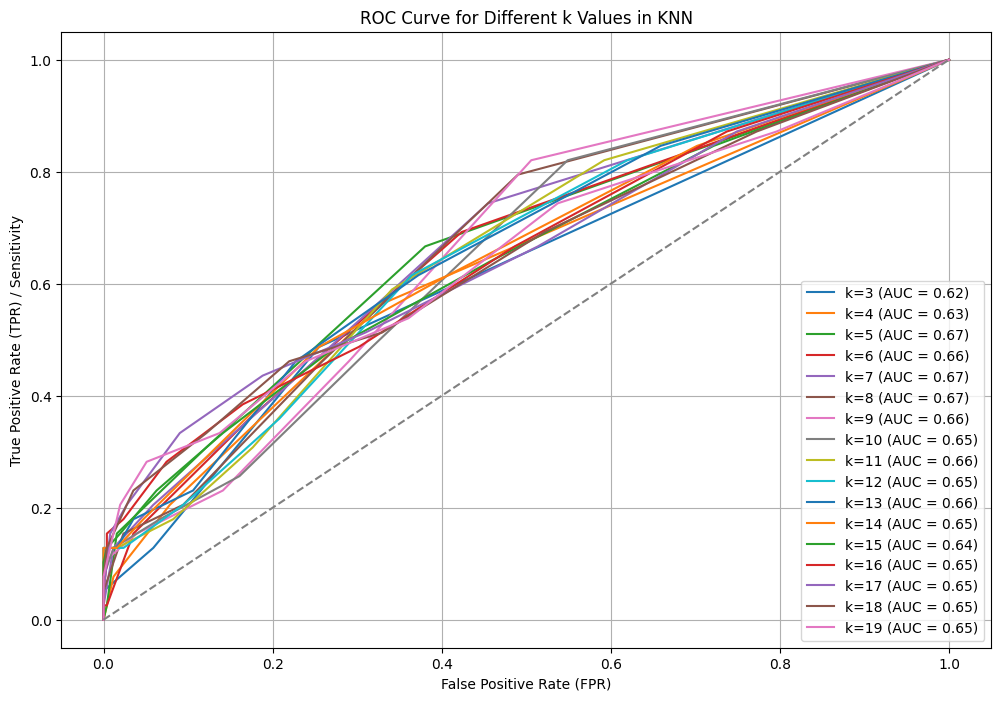

In [ ]:
from sklearn.metrics import roc_curve, auc
k_values = np.arange(3,20)
accuracy_values = []
plt.figure(figsize=(12, 8))

for k in k_values:

    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(x2_train_normalized, y2_train)
    y2_pred = knn_classifier.predict(x2_test_normalized)
    accuracy = accuracy_score(y2_test, y2_pred)
    accuracy_values.append(accuracy)
    y_prob = knn_classifier.predict_proba(x2_test_normalized)[:, 1]

    fpr, tpr, _ = roc_curve(y2_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'k={k} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve for Different k Values in KNN')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) / Sensitivity')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, LeaveOneOut, ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

k_values = np.arange(3,20)
accuracy_stratified = []
accuracy_kfold = []
accuracy_shuffled = []
accuracy_leave_one_out = []

scaler_minmax = MinMaxScaler()
x2_normalized = scaler_minmax.fit_transform(x2)

for k in k_values:

    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    stratified_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    scores = cross_val_score(knn_classifier,x2_normalized, y2, cv=stratified_cv, scoring='accuracy')
    accuracy_stratified.append(np.mean(scores))

    kfold_cv = KFold(n_splits=10, shuffle=True, random_state=42)
    scores = cross_val_score(knn_classifier,x2_normalized, y2, cv=kfold_cv, scoring='accuracy')
    accuracy_kfold.append(np.mean(scores))

    shuffled_cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
    scores = cross_val_score(knn_classifier,x2_normalized, y2, cv=shuffled_cv, scoring='accuracy')
    accuracy_shuffled.append(np.mean(scores))

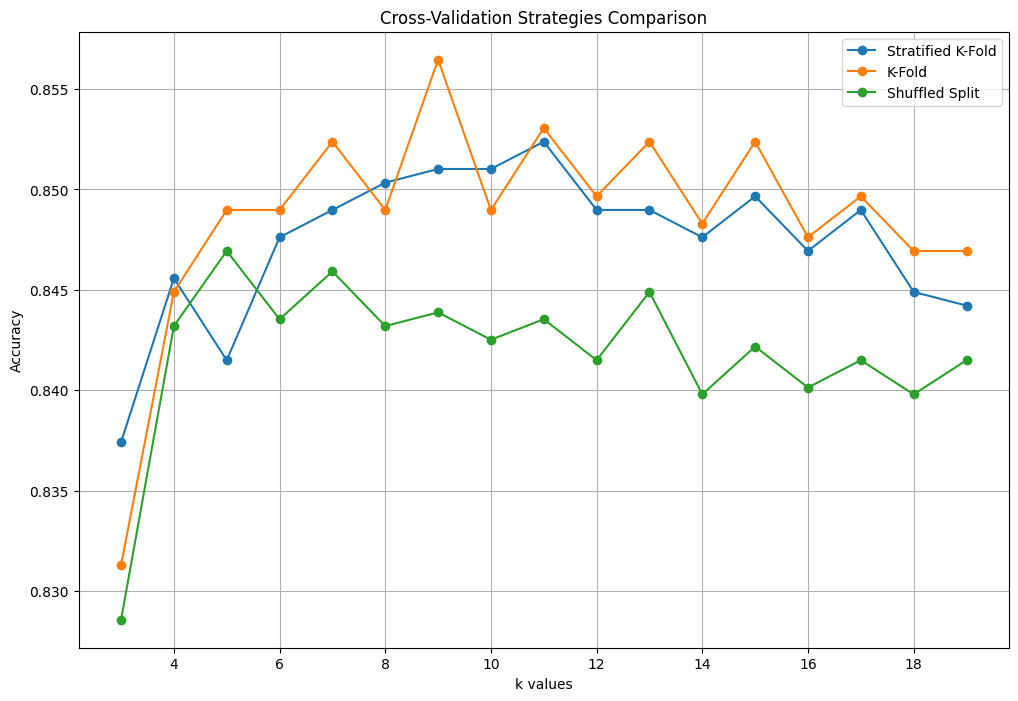

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(k_values, accuracy_stratified, label='Stratified K-Fold', marker='o')
plt.plot(k_values, accuracy_kfold, label='K-Fold', marker='o')
plt.plot(k_values, accuracy_shuffled, label='Shuffled Split', marker='o')

plt.title('Cross-Validation Strategies Comparison')
plt.xlabel('k values')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.ensemble import BaggingClassifier

bagging_model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=11),
                                  n_estimators=10, random_state=42)
bagging_model.fit(x2_train_normalized, y2_train)
y_pred_bagging = bagging_model.predict(x2_test_normalized)
accuracy_bagging = accuracy_score(y2_test, y_pred_bagging)
print(f"Accuracy with Bagging: {accuracy_bagging:.2f}")
classification_rep = classification_report(y2_test, y_pred_bagging)
print(f'Classification Report:\n{classification_rep}')

Accuracy with Bagging: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       255
           1       0.80      0.10      0.18        39

    accuracy                           0.88       294
   macro avg       0.84      0.55      0.56       294
weighted avg       0.87      0.88      0.83       294



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

undersampler = RandomUnderSampler(random_state=42)
x2_resampled, y2_resampled = undersampler.fit_resample(x2_train_normalized, y2_train)

knn_model = KNeighborsClassifier(n_neighbors=11)
knn_model.fit(x2_resampled, y2_resampled)
y2_pred = knn_model.predict(x2_test_normalized)

accuracy = accuracy_score(y2_test, y2_pred)
print(f"Accuracy after Undersampling: {accuracy:.2f}")
classification_rep = classification_report(y2_test, y2_pred)
print(f'Classification Report:\n{classification_rep}')

Accuracy after Undersampling: 0.68
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.70      0.79       255
           1       0.21      0.51      0.30        39

    accuracy                           0.68       294
   macro avg       0.56      0.61      0.54       294
weighted avg       0.81      0.68      0.72       294



In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

oversampler = RandomOverSampler(random_state=42)
x2_resampled, y2_resampled = oversampler.fit_resample(x2_train_normalized, y2_train)

knn_model = KNeighborsClassifier(n_neighbors=11)
knn_model.fit(x2_resampled, y2_resampled)
y2_pred = knn_model.predict(x2_test_normalized)

accuracy = accuracy_score(y2_test, y2_pred)
print(f"Accuracy after Oversampling: {accuracy:.2f}")
classification_rep = classification_report(y2_test, y2_pred)
print(f'Classification Report:\n{classification_rep}')

Accuracy after Oversampling: 0.66
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.69      0.78       255
           1       0.19      0.49      0.28        39

    accuracy                           0.66       294
   macro avg       0.55      0.59      0.53       294
weighted avg       0.80      0.66      0.71       294



In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

smote = SMOTE(random_state=42)
x2_resampled, y2_resampled = smote.fit_resample(x2_train_normalized, y2_train)
knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model.fit(x2_resampled, y2_resampled)

y2_pred = knn_model.predict(x2_test_normalized)

accuracy = accuracy_score(y2_test, y2_pred)
print(f"Accuracy after SMOTE: {accuracy:.2f}")
classification_rep = classification_report(y2_test, y2_pred)
print(f'Classification Report:\n{classification_rep}')

Accuracy after SMOTE: 0.72
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.76      0.82       255
           1       0.23      0.46      0.30        39

    accuracy                           0.72       294
   macro avg       0.56      0.61      0.56       294
weighted avg       0.81      0.72      0.75       294



In [ ]:
from imblearn.over_sampling import ADASYN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

adasyn = ADASYN(sampling_strategy='auto', random_state=42)
x2_resampled, y2_resampled = adasyn.fit_resample(x2_train_normalized, y2_train)

knn_model = KNeighborsClassifier(n_neighbors=11)
knn_model.fit(x2_resampled, y2_resampled)
y2_pred = knn_model.predict(x2_test_normalized)

accuracy = accuracy_score(y2_test, y2_pred)
print(f"Accuracy with ADASYN: {accuracy:.2f}")
classification_rep = classification_report(y2_test, y2_pred)
print(f'Classification Report:\n{classification_rep}')

Accuracy with ADASYN: 0.61
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.59      0.72       255
           1       0.22      0.74      0.34        39

    accuracy                           0.61       294
   macro avg       0.58      0.67      0.53       294
weighted avg       0.84      0.61      0.67       294



In [ ]:
import pandas as pd

df3 = pd.read_csv("/content/Employee.csv")
df3

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [ ]:
df3['Education'] = df3['Education'].replace({'Bachelors':'0','Masters':'1','PHD':'2'})
df3['City'] = df3['City'].replace({'Bangalore':'0','Pune':'1','New Delhi':'2'})
df3['EverBenched'] = df3['EverBenched'].replace({'No':'0','Yes':'1'})
df3['Gender'] = df3['Gender'].replace({'Female':'0','Male':'1'})

df3['Education']= df3['Education'].astype('int')
df3['City']=df3['City'].astype('int')
df3['Gender']= df3['Gender'].astype('int')
df3['EverBenched']= df3['EverBenched'].astype('int')

df3

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,1,1,28,0,0,3,1
2,0,2014,2,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,1,3,24,1,1,2,1
...,...,...,...,...,...,...,...,...,...
4648,0,2013,0,3,26,0,0,4,0
4649,1,2013,1,2,37,1,0,2,1
4650,1,2018,2,3,27,1,0,5,1
4651,0,2012,0,3,30,1,1,2,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score ,classification_report

x3 = df3.drop('LeaveOrNot', axis=1)
y3 = df3['LeaveOrNot']

x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.2, random_state=42)

knn_classifier = KNeighborsClassifier(n_neighbors=6)
knn_classifier.fit(x3_train, y3_train)
y3_pred = knn_classifier.predict(x3_test)

accuracy_1 = accuracy_score(y3_test, y3_pred)
print(f'Accuracy: {accuracy_1 * 100:.2f}%')
classification_rep = classification_report(y3_test, y3_pred)
print(f'Classification Report:\n{classification_rep})')

Accuracy: 80.24%
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.95      0.86       610
           1       0.84      0.53      0.65       321

    accuracy                           0.80       931
   macro avg       0.82      0.74      0.76       931
weighted avg       0.81      0.80      0.79       931
)


In [ ]:
from scipy import stats

z_scores = stats.zscore(df3)
threshold = 2
outliers = (z_scores > threshold).all(axis=1)
df10 = df3[~outliers]

x10 = df10.drop('LeaveOrNot', axis=1)
y10 = df10['LeaveOrNot']

x10_train, x10_test, y10_train, y10_test = train_test_split(x10, y10, test_size=0.2)

knn_classifier = KNeighborsClassifier(n_neighbors=4)
knn_classifier.fit(x10_train, y10_train)
y10_pred = knn_classifier.predict(x10_test)

accuracy = accuracy_score(y10_test, y10_pred)
print(f"Accuracy: {accuracy}")
classification_rep = classification_report(y10_test, y10_pred)
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.7636949516648764
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.94      0.84       608
           1       0.78      0.44      0.56       323

    accuracy                           0.76       931
   macro avg       0.77      0.69      0.70       931
weighted avg       0.77      0.76      0.74       931



In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_standard = StandardScaler()
x3_train_standardized = scaler_standard.fit_transform(x3_train)
x3_test_standardized = scaler_standard.transform(x3_test)

scaler_minmax = MinMaxScaler()
x3_train_normalized = scaler_minmax.fit_transform(x3_train)
x3_test_normalized = scaler_minmax.transform(x3_test)

knn_classifier.fit(x3_train_standardized, y3_train)
y3_pred_stand = knn_classifier.predict(x3_test_standardized)
accuracy_stand = accuracy_score(y3_test, y3_pred_stand)
print(f'Accuracy after standarization: {accuracy_stand * 100:.2f}%')
classification_rep = classification_report(y3_test, y3_pred_stand)
print(f'Classification Report:\n{classification_rep}')

knn_classifier.fit(x3_train_normalized, y3_train)
y3_pred_nor = knn_classifier.predict(x3_test_normalized)
accuracy_nor = accuracy_score(y3_test, y3_pred_nor)
print(f'Accuracy after normalization: {accuracy_stand * 100:.2f}%')
classification_rep = classification_report(y3_test, y3_pred_nor)
print(f'Classification Report:\n{classification_rep}')

Accuracy after standarization: 82.49%
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.95      0.88       610
           1       0.86      0.59      0.70       321

    accuracy                           0.82       931
   macro avg       0.84      0.77      0.79       931
weighted avg       0.83      0.82      0.82       931

Accuracy after normalization: 82.49%
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       610
           1       0.87      0.60      0.71       321

    accuracy                           0.83       931
   macro avg       0.84      0.77      0.79       931
weighted avg       0.84      0.83      0.82       931



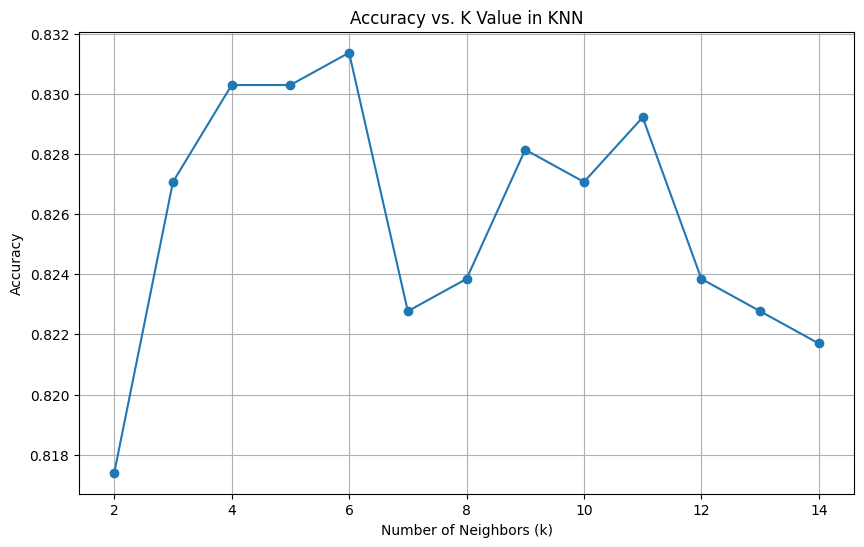

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

k_values = np.arange(2,15)
accuracy_values = []
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(x3_train_normalized, y3_train)
    y3_pred = knn_classifier.predict(x3_test_normalized)
    accuracy = accuracy_score(y3_test, y3_pred)
    accuracy_values.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_values, marker='o', linestyle='-')
plt.title('Accuracy vs. K Value in KNN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

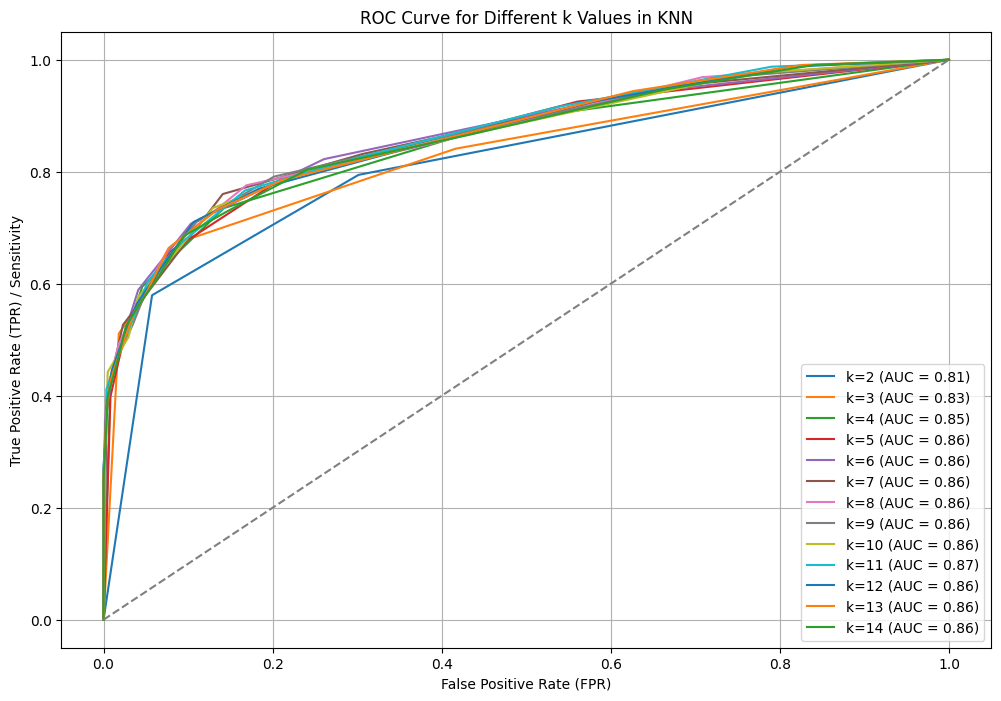

In [ ]:
from sklearn.metrics import roc_curve, auc
k_values = np.arange(2,15)
accuracy_values = []
plt.figure(figsize=(12, 8))

for k in k_values:

    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(x3_train_normalized, y3_train)
    y3_pred = knn_classifier.predict(x3_test_normalized)
    accuracy = accuracy_score(y3_test, y3_pred)
    accuracy_values.append(accuracy)
    y_prob = knn_classifier.predict_proba(x3_test_normalized)[:, 1]

    fpr, tpr, _ = roc_curve(y3_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'k={k} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve for Different k Values in KNN')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) / Sensitivity')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, LeaveOneOut, ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

k_values = np.arange(2,15)
accuracy_stratified = []
accuracy_kfold = []
accuracy_shuffled = []
accuracy_leave_one_out = []

scaler_minmax = MinMaxScaler()
x3_normalized = scaler_minmax.fit_transform(x3)

for k in k_values:

    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    stratified_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    scores = cross_val_score(knn_classifier,x3_normalized, y3, cv=stratified_cv, scoring='accuracy')
    accuracy_stratified.append(np.mean(scores))

    kfold_cv = KFold(n_splits=10, shuffle=True, random_state=42)
    scores = cross_val_score(knn_classifier,x3_normalized, y3, cv=kfold_cv, scoring='accuracy')
    accuracy_kfold.append(np.mean(scores))

    shuffled_cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
    scores = cross_val_score(knn_classifier,x3_normalized, y3, cv=shuffled_cv, scoring='accuracy')
    accuracy_shuffled.append(np.mean(scores))

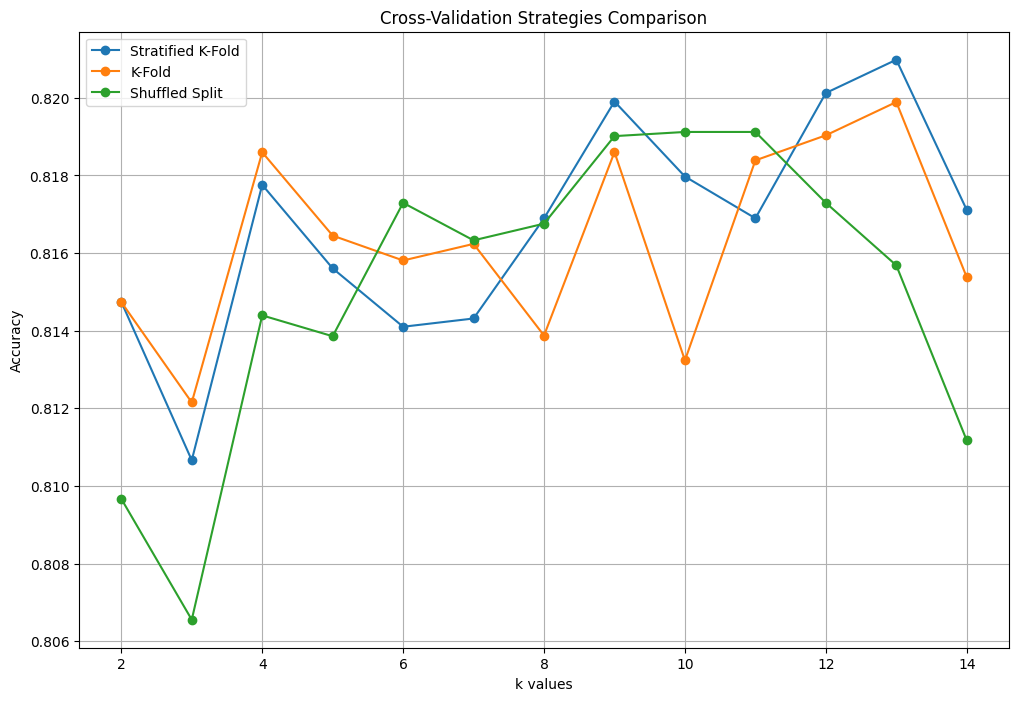

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(k_values, accuracy_stratified, label='Stratified K-Fold', marker='o')
plt.plot(k_values, accuracy_kfold, label='K-Fold', marker='o')
plt.plot(k_values, accuracy_shuffled, label='Shuffled Split', marker='o')

plt.title('Cross-Validation Strategies Comparison')
plt.xlabel('k values')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.ensemble import BaggingClassifier

bagging_model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=6),
                                  n_estimators=10, random_state=42)
bagging_model.fit(x3_train_normalized, y3_train)
y_pred_bagging = bagging_model.predict(x3_test_normalized)
accuracy_bagging = accuracy_score(y3_test, y_pred_bagging)
print(f"Accuracy with Bagging: {accuracy_bagging:.2f}")
classification_rep = classification_report(y3_test, y_pred_bagging)
print(f'Classification Report:\n{classification_rep}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy with Bagging: 0.84
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       610
           1       0.85      0.63      0.73       321

    accuracy                           0.84       931
   macro avg       0.84      0.79      0.80       931
weighted avg       0.84      0.84      0.83       931



In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

undersampler = RandomUnderSampler(random_state=42)
x3_resampled, y3_resampled = undersampler.fit_resample(x3_train_normalized, y3_train)

knn_model = KNeighborsClassifier(n_neighbors=6)
knn_model.fit(x3_resampled, y3_resampled)
y3_pred = knn_model.predict(x3_test_normalized)

accuracy = accuracy_score(y3_test, y3_pred)
print(f"Accuracy after Undersampling: {accuracy:.2f}")
classification_rep = classification_report(y3_test, y3_pred)
print(f'Classification Report:\n{classification_rep}')

Accuracy after Undersampling: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       610
           1       0.78      0.66      0.72       321

    accuracy                           0.82       931
   macro avg       0.81      0.78      0.79       931
weighted avg       0.82      0.82      0.82       931



In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

oversampler = RandomOverSampler(random_state=42)
x3_resampled, y3_resampled = oversampler.fit_resample(x3_train_normalized, y3_train)

knn_model = KNeighborsClassifier(n_neighbors=6)
knn_model.fit(x3_resampled, y3_resampled)
y3_pred = knn_model.predict(x3_test_normalized)

accuracy = accuracy_score(y3_test, y3_pred)
print(f"Accuracy after Oversampling: {accuracy:.2f}")
classification_rep = classification_report(y3_test, y3_pred)
print(f'Classification Report:\n{classification_rep}')

Accuracy after Oversampling: 0.83
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       610
           1       0.79      0.68      0.73       321

    accuracy                           0.83       931
   macro avg       0.82      0.79      0.80       931
weighted avg       0.82      0.83      0.82       931



In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

smote = SMOTE(random_state=42)
x3_resampled, y3_resampled = smote.fit_resample(x3_train_normalized, y3_train)
knn_model = KNeighborsClassifier(n_neighbors=6)
knn_model.fit(x3_resampled, y3_resampled)

y3_pred = knn_model.predict(x3_test_normalized)

accuracy = accuracy_score(y3_test, y3_pred)
print(f"Accuracy after SMOTE: {accuracy:.2f}")
classification_rep = classification_report(y3_test, y3_pred)
print(f'Classification Report:\n{classification_rep}')

Accuracy after SMOTE: 0.83
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       610
           1       0.77      0.73      0.75       321

    accuracy                           0.83       931
   macro avg       0.82      0.81      0.81       931
weighted avg       0.83      0.83      0.83       931



In [ ]:
# adaptive synthetic sampling

from imblearn.over_sampling import ADASYN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

adasyn = ADASYN(sampling_strategy='auto', random_state=42)
x3_resampled, y3_resampled = adasyn.fit_resample(x3_train_normalized, y3_train)

knn_model = KNeighborsClassifier(n_neighbors=6)
knn_model.fit(x3_resampled, y3_resampled)
y3_pred = knn_model.predict(x3_test_normalized)

accuracy = accuracy_score(y3_test, y3_pred)
print(f"Accuracy with ADASYN: {accuracy:.2f}")
classification_rep = classification_report(y3_test, y3_pred)
print(f'Classification Report:\n{classification_rep}')

Accuracy with ADASYN: 0.80
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.85       610
           1       0.70      0.74      0.72       321

    accuracy                           0.80       931
   macro avg       0.78      0.79      0.79       931
weighted avg       0.81      0.80      0.80       931

